In [85]:
#Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sea


## 0. Data Preparation


In [11]:
df_raw = pd.read_csv('dataset/DougScore%20-%20DougScore%20-%20DougScore%20-%20DougScore.csv')
df_raw.iloc[0,[0,1,2,8,14, 15,16,17,18,19]] = ['Year', 'Brand', 'Name', 'Weekend_Score', 'Daily_Score', 'Doug_Score', "Video_Link", "Filming_Location_City", "Filming_Location_State", "Vehicle_Country"]
df_raw.columns = df_raw.iloc[0,::]
df_raw.drop(df_raw.index[[0,1]], inplace = True)
df_raw.index = range(0,len(df_raw.index))
df_raw.iloc[:,3:16] = df_raw.iloc[:,3:16].astype(int)
df_raw

/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/2566728834.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Year' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[0,[0,1,2,8,14, 15,16,17,18,19]] = ['Year', 'Brand', 'Name', 'Weekend_Score', 'Daily_Score', 'Doug_Score', "Video_Link", "Filming_Location_City", "Filming_Location_State", "Vehicle_Country"]
/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/2566728834.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Weekend_Score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[0,[0,1,2,8,14, 15,16,17,18,19]] = ['Year', 'Brand', 'Name', 'Weekend_Score', 'Daily_Score', 'Doug_Score', "Video_Link", "Filming_Location_City", "Filming_Location_State", "Vehicle_Cou

,Year,Brand,Name,Styling,Acceleration,Handling,Fun Factor,Cool Factor,Weekend_Score,Features,Comfort,Quality,Practicality,Value,Daily_Score,Doug_Score,Video_Link,Filming_Location_City,Filming_Location_State,Vehicle_Country
0,2020.0,McLaren,Speedtail,8,10,10,10,10,48,7,4,7,2,6,26,74,38:57:00,Columbus,Ohio,UK
1,1994.0,McLaren,F1,8,9,10,10,10,47,2,3,9,3,10,27,74,39:50:00,Burbank,California,UK
2,2022.0,Lucid,Air Dream Edition,7,10,6,7,8,38,9,8,7,5,6,35,73,39:40:00,Los Angeles,California,USA
3,2022.0,GMC,Hummer EV Pickup,5,9,4,9,7,34,9,7,7,9,7,39,73,33:42:00,Detroit,Michigan,USA
4,2021.0,Rivian,R1T,7,9,5,9,7,37,7,6,6,9,8,36,73,44:48:00,San Diego,California,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2012.0,Nissan,Murano CrossCabriolet,2,1,3,1,2,9,4,5,5,4,3,21,30,6:49,Philadelphia,Pennsylvania,Japan
581,2017.0,Mercedes-Benz,Metris,3,1,3,1,1,9,4,6,4,6,1,21,30,25:30:00,Denver,Colorado,Germany
582,1988.0,Yugo,GV,3,1,2,3,6,15,2,3,1,3,5,14,29,9:51,Douglasville,Georgia,Yugoslavia
583,1971.0,Trabant,Trabant,2,1,1,3,7,14,1,2,1,3,6,13,27,9:40,Fairfax,Virginia,East Germany


## 1. Relationship Analysis

In [14]:
df = df_raw.copy()
# Correlation funcion
def corr_matrix(numeric_columns: list, data: pd.DataFrame):
    #Correlation Matrix
    corr_df = data[numeric_columns].astype(float).corr()
    #display(corr_df)
    sea.heatmap(round(corr_df,2), annot = True,cmap = 'viridis')
    plt.title("Correlation Matrix: {}".format(("-").join(numeric_columns)), fontweight = 'bold', fontsize = 12)

    #Setting
    plt.gcf().set_size_inches(5,5)
    plt.gcf().set_dpi(100)
    plt.subplots_adjust(bottom = .25)
    plt.xticks(size = 12)
    plt.yticks(size = 12)

    return plt.show()

def top5_cars(numeric_columns: list, data: pd.DataFrame):
    df_top = data.set_index(["Year", "Brand","Name"], drop= True)[numeric_columns].astype(float)
    df_top['Avg_Score'] = df_top.mean(axis =1)
    
    return df_top.nlargest(columns = ['Avg_Score'], n = 5).sort_values('Avg_Score', ascending = False)



### A. Fun factor, practicality, value

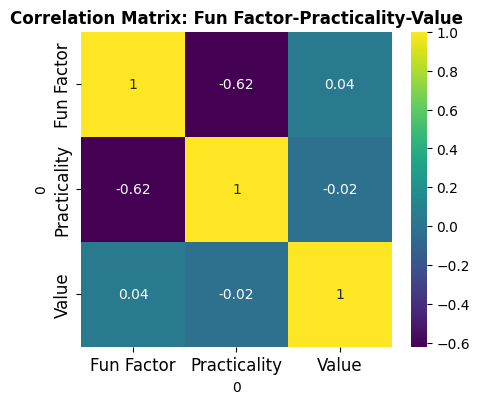

,,,Fun Factor,Practicality,Value,Avg_Score
Year,Brand,Name,,,,
2021.0,Rivian,R1T,9.0,9.0,8.0,8.666667
2022.0,GMC,Hummer EV Pickup,9.0,9.0,7.0,8.333333
2021.0,Dodge,Ram TRX,8.0,8.0,8.0,8.000000
2013.0,Ford,Raptor,6.0,8.0,10.0,8.000000
2020.0,Jeep,Gladiator Mojave,8.0,8.0,8.0,8.000000


In [4]:
corr_matrix(["Fun Factor", "Practicality", "Value"], df)
top5_cars(["Fun Factor", "Practicality", "Value"], df)

 **Comments**:
* There's a strong negative correlation between "Fun Factor" and "Practicality" (-0.62). This implies that vehicles with higher fun factors tend to be less practical and vice versa.
* The "Value" category doesn't have a strong correlation with either "Fun Factor" or "Practicality."

**Top 5 Cars**:
1. Rivian R1T (2021) with an average score of 8.67
2. GMC Hummer EV Pickup (2022) with an average score of 8.33
3. Dodge Ram TRX (2021) with an average score of 8.00
4. Ford Raptor (2013) with an average score of 8.00
5. Jeep Gladiator Mojave (2020) with an average score of 8.00

### B. Acceleration, handling, comfort

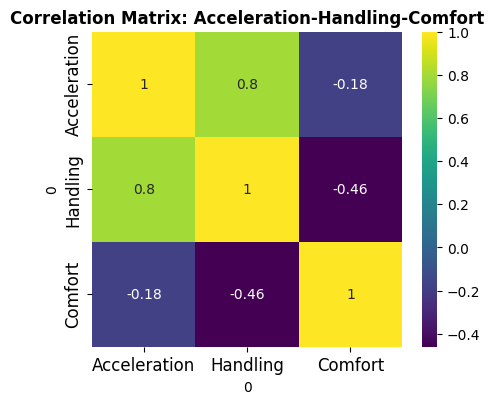

,,,Acceleration,Handling,Comfort,Avg_Score
Year,Brand,Name,,,,
2020.0,McLaren,Speedtail,10.0,10.0,4.0,8.0
2022.0,Lucid,Air Dream Edition,10.0,6.0,8.0,8.0
2019.0,Bugatti,Divo,10.0,9.0,5.0,8.0
2021.0,Bugatti,Chiron Pur Sport,10.0,9.0,5.0,8.0
2018.0,Bugatti,Chiron,10.0,9.0,5.0,8.0


In [5]:
corr_matrix(["Acceleration", "Handling", "Comfort"], df)
top5_cars(["Acceleration", "Handling", "Comfort"], df)

**Comments**:
* There's a strong positive correlation between "Acceleration" and "Handling" (0.8). This indicates that vehicles with better acceleration generally also have better handling.
* Both "Acceleration" and "Handling" have a negative correlation with "Comfort," with "Handling" and "Comfort" having a stronger negative correlation (-0.46). This suggests that vehicles with better handling tend to be less comfortable.

**Top 5 Cars**:
1. McLaren Speedtail (2020) with an average score of 8.0
2. Lucid Air Dream Edition (2022) with an average score of 8.0
3. Bugatti Divo (2019) with an average score of 8.0
4. Bugatti Chiron Pur Sport (2021) with an average score of 8.0
5. Bugatti Chiron (2018) with an average score of 8.0

### C. Styling, Cool Factor, Quality

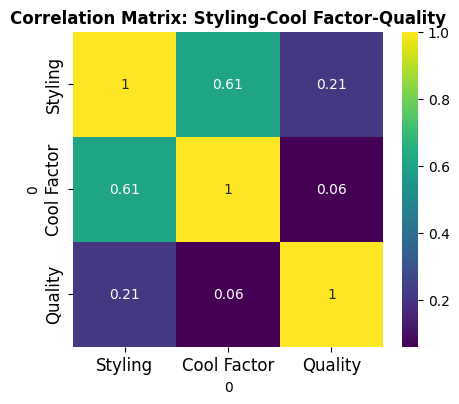

,,,Styling,Cool Factor,Quality,Avg_Score
Year,Brand,Name,,,,
2005.0,Porsche,Carrera GT,9.0,10.0,9.0,9.333333
1994.0,McLaren,F1,8.0,10.0,9.0,9.000000
2020.0,Ferrari,Monza SP1,9.0,10.0,8.0,9.000000
1963.0,Ferrari,250 GT Lusso,10.0,9.0,8.0,9.000000
1954.0,Mercedes-Benz,300SL Gullwing,10.0,10.0,7.0,9.000000


In [6]:
corr_matrix(["Styling", "Cool Factor", "Quality"], df)
top5_cars(["Styling", "Cool Factor", "Quality"], df)

**Comments**:
* There's a moderately strong positive correlation between "Styling" and "Cool Factor" (0.61). Vehicles with better styling tend to also have a higher cool factor.
* "Quality" has a weak positive correlation with both "Styling" and "Cool Factor," suggesting that higher quality vehicles might have slightly better styling and coolness, but the correlation is not very strong.

**Top 5 Cars**:
1. Porsche Carrera GT (2005) with an average score of 9.33
2. McLaren F1 (1994) with an average score of 9.00
3. Ferrari Monza SP1 (2020) with an average score of 9.00
4. Ferrari 250 GT Lusso (1963) with an average score of 9.00
5. Mercedes-Benz 300SL Gullwing (1954) with an average score of 9.00

### D -  Weekend score, Daily score, Brand

* For this group, given to the presencence of a categorical variable, I'll run an ANOVA test to determine if there are statiscally signifcante differences in score based on the brand 

In [19]:
# Box Plot
def plot_box(dataset,x,xlabel,ylabel,title):
    #plotting a box-splot chart
    sea.set_style('darkgrid', {'axes.grid': True})
    plt.figure()
    box = sea.boxplot(data = dataset, x = x, y = ylabel, palette = "Set3", orient = "v", linewidth = 0.5, saturation= 0.76, fliersize= 0)
    swarm = sea.swarmplot(data = dataset, x = x, y = ylabel , palette = 'Set3', orient = 'v', size = 7,alpha= 0.64, edgecolor= 'grey', linewidth = 0.4)
    plt.xlabel(xlabel,fontsize = 11)
    plt.ylabel(ylabel, fontsize = 11)
    plt.title(title, fontweight = 'bold')


    #Adjusts
    plt.gcf().set_size_inches(23,8)
    plt.gcf().set_dpi(100)
    plt.xticks(rotation = 35)
   


#### D.1 - Weekend Score vs Brand

In [45]:
# Preparing dataset
weekend_score = df[['Brand', 'Weekend_Score']].astype({"Weekend_Score": float})
display(weekend_score)

,Brand,Weekend_Score
0,McLaren,48.0
1,McLaren,47.0
2,Lucid,38.0
3,GMC,34.0
4,Rivian,37.0
...,...,...
580,Nissan,9.0
581,Mercedes-Benz,9.0
582,Yugo,15.0
583,Trabant,14.0


/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/1992795851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sea.boxplot(data = dataset, x = x, y = ylabel, palette = "Set3", orient = "v", linewidth = 0.5, saturation= 0.76, fliersize= 0)
/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/1992795851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  swarm = sea.swarmplot(data = dataset, x = x, y = ylabel , palette = 'Set3', orient = 'v', size = 7,alpha= 0.64, edgecolor= 'grey', linewidth = 0.4)
/Users/rodolfo/Desktop/Projects/Blockchain-Projects/Navigating-Through-Doug-Car-Scores 🚙/venv/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 68.8% of the points

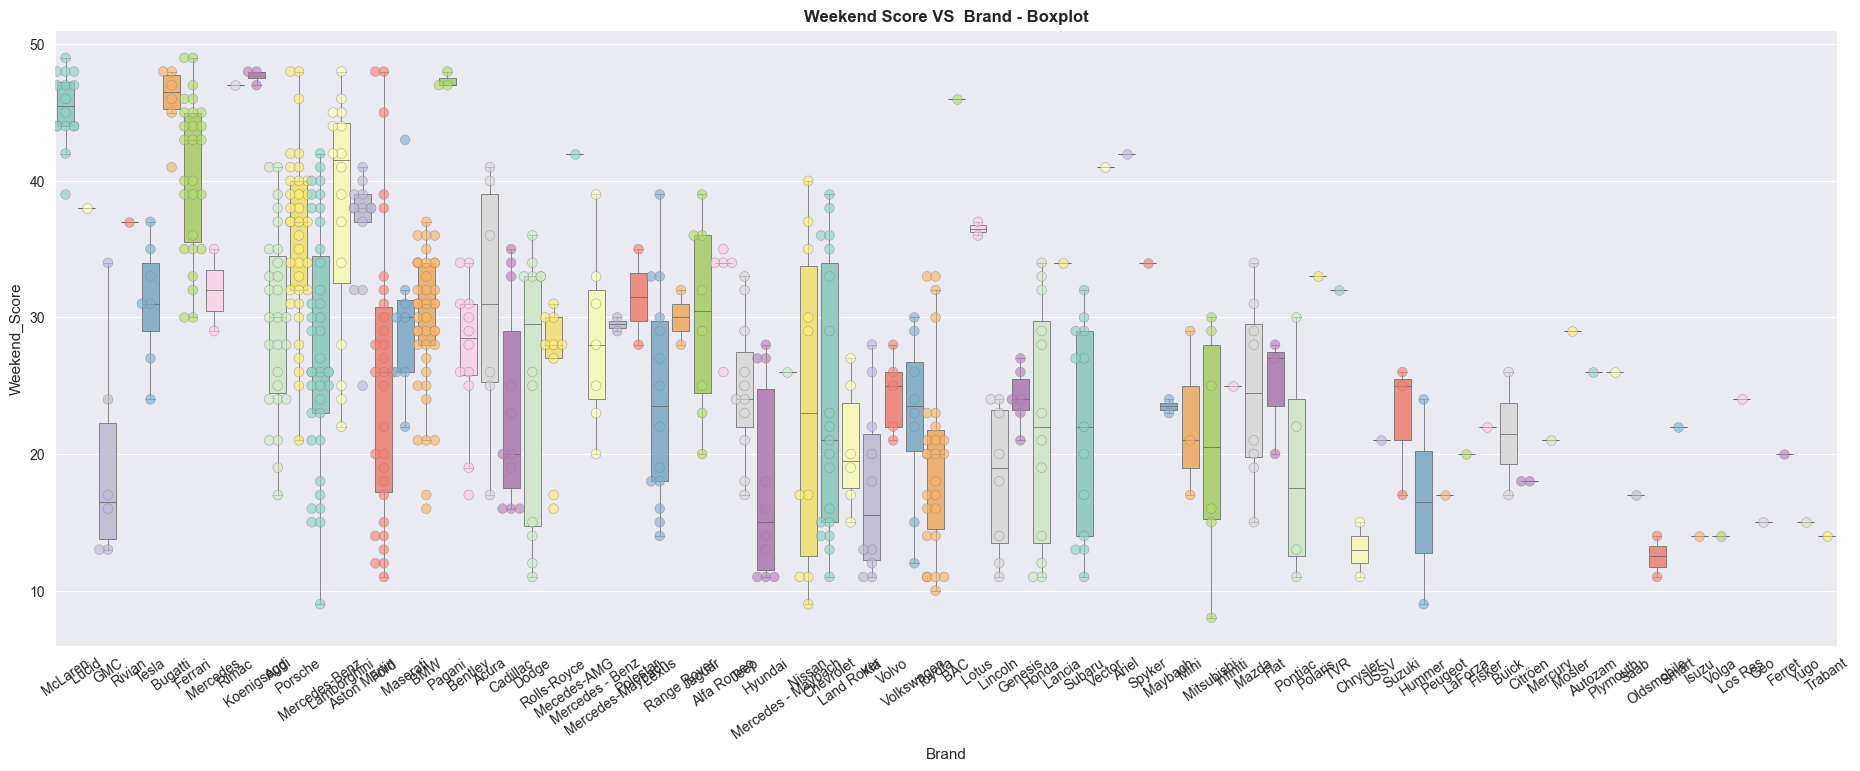

In [46]:
plot_box(weekend_score, "Brand","Brand","Weekend_Score",'Weekend Score VS  Brand - Boxplot')

#### D.2 - Summary

In [56]:
# ANOVA for Weekend Score vs Brand
weekend_obj = ols(formula='Weekend_Score ~ Brand', data=weekend_score).fit()
anova_weekend_summary = sm.stats.anova_lm(weekend_obj, typ=2)
display(anova_weekend_summary)

# ANOVA for Daily Score vs Brand
weekend_obj = ols(formula='Daily_Score ~ Brand', data=df[['Brand', 'Daily_Score']].astype({"Daily_Score": float})).fit()
anova_weekend_summary = sm.stats.anova_lm(weekend_obj, typ=2)
display(anova_weekend_summary)

# Correlation between Weekend Score and Daily Score
display(df[["Weekend_Score", "Daily_Score"]].corr())


,sum_sq,df,F,PR(>F)
Brand,32555.972690,83.0,7.764756,6.217911e-51
Residual,25308.273464,501.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Brand,9295.068810,83.0,4.702181,5.296953e-28
Residual,11931.991019,501.0,NaN,NaN


,Weekend_Score,Daily_Score
0,,
Weekend_Score,1.000000,-0.313699
Daily_Score,-0.313699,1.000000


In [60]:
#Top 5 cars for the group D
# Only considering quantitative variables to run the ranking
top5_cars(["Weekend_Score", "Daily_Score"], df)

0                                 Weekend_Score  Daily_Score  Avg_Score
Year   Brand   Name                                                    
2020.0 McLaren Speedtail                   48.0         26.0       37.0
1994.0 McLaren F1                          47.0         27.0       37.0
2022.0 Lucid   Air Dream Edition           38.0         35.0       36.5
       GMC     Hummer EV Pickup            34.0         39.0       36.5
2021.0 Rivian  R1T                         37.0         36.0       36.5

**ANOVA Results**:
* For Weekend Score based on the Brand, the F-statistic is significantly large with a very small p-value (almost zero). This means there's a statistically significant difference in weekend scores among different brands.
* For Daily Score based on the Brand, the F-statistic is also significantly large with a very small p-value. This suggests a statistically significant difference in daily scores among different brands.

**Correlations**:
* There's a moderate negative correlation between "Weekend Score" and "Daily Score" (-0.314). This indicates that vehicles with higher weekend scores might have slightly lower daily scores, and vice versa.

**Top 5 Cars**:
1. McLaren Speedtail (2020) with an average score of 37.0
2. McLaren F1 (1994) with an average score of 37.0
3. Lucid Air Dream Edition (2022) with an average score of 36.5
4. GMC Hummer EV Pickup (2022) with an average score of 36.5
5. Rivian R1T (2021) with an average score of 36.5

### E -  Weekend score, Daily score, Model Year

In [136]:
# Preparing dataset
weekend_score = df[['Year', 'Weekend_Score']].astype({"Weekend_Score": float})
display(weekend_score)

,Year,Weekend_Score
0,2020.0,48.0
1,1994.0,47.0
2,2022.0,38.0
3,2022.0,34.0
4,2021.0,37.0
...,...,...
580,2012.0,9.0
581,2017.0,9.0
582,1988.0,15.0
583,1971.0,14.0


/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/1992795851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sea.boxplot(data = dataset, x = x, y = ylabel, palette = "Set3", orient = "v", linewidth = 0.5, saturation= 0.76, fliersize= 0)
/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/1992795851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  swarm = sea.swarmplot(data = dataset, x = x, y = ylabel , palette = 'Set3', orient = 'v', size = 7,alpha= 0.64, edgecolor= 'grey', linewidth = 0.4)
/Users/rodolfo/Desktop/Projects/Blockchain-Projects/Navigating-Through-Doug-Car-Scores 🚙/venv/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 50.0% of the points

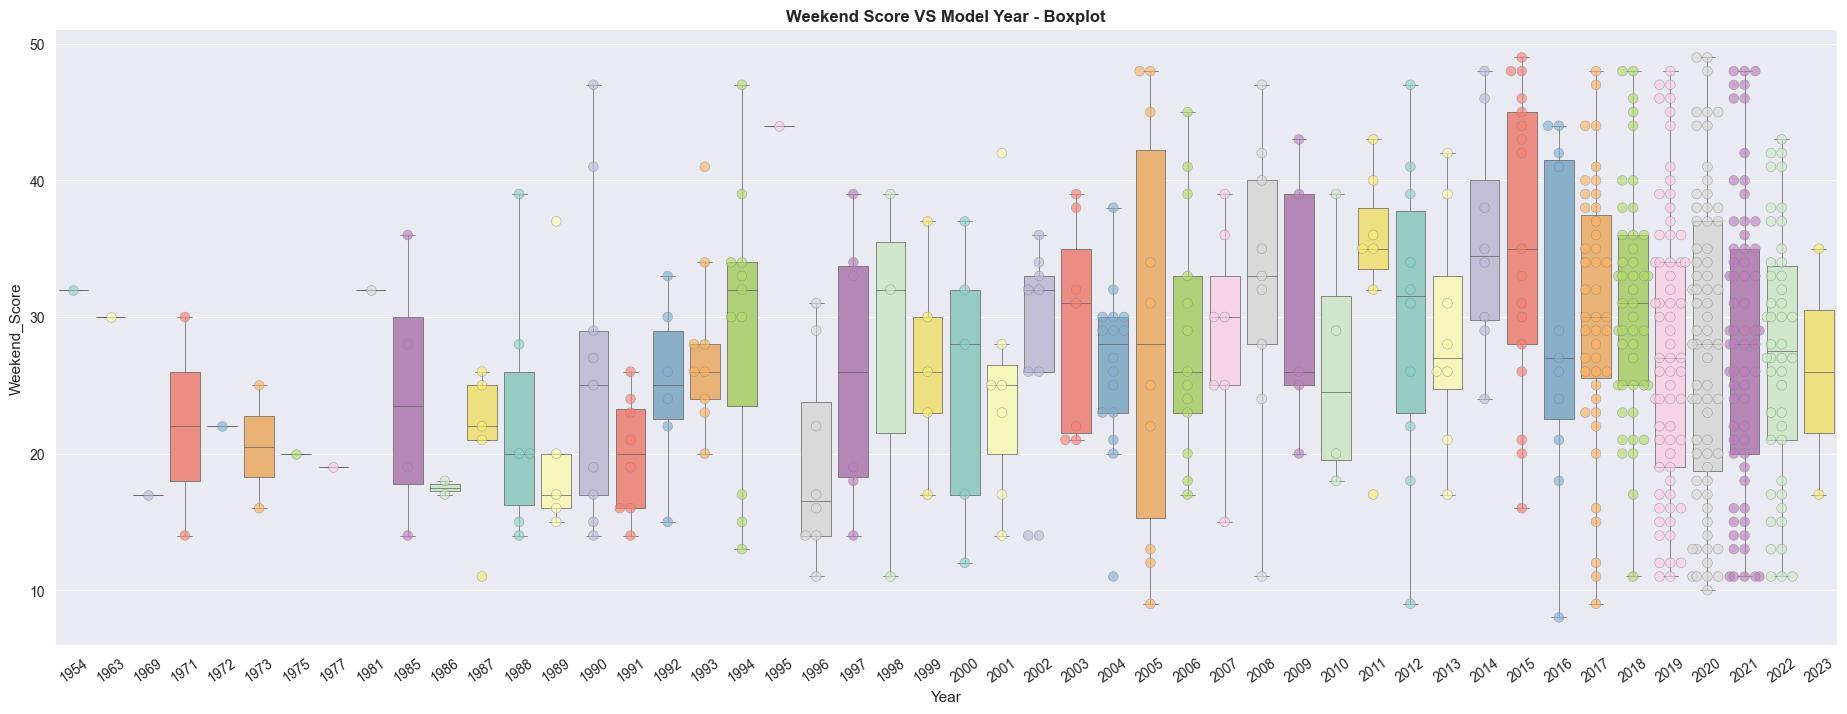

In [139]:
# Weekend Score VS Model Year - Boxplot
plot_box(weekend_score.astype({'Year': int}), "Year","Year","Weekend_Score",'Weekend Score VS Model Year - Boxplot')

/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/1992795851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sea.boxplot(data = dataset, x = x, y = ylabel, palette = "Set3", orient = "v", linewidth = 0.5, saturation= 0.76, fliersize= 0)
/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_80087/1992795851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  swarm = sea.swarmplot(data = dataset, x = x, y = ylabel , palette = 'Set3', orient = 'v', size = 7,alpha= 0.64, edgecolor= 'grey', linewidth = 0.4)
/Users/rodolfo/Desktop/Projects/Blockchain-Projects/Navigating-Through-Doug-Car-Scores 🚙/venv/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 25.0% of the points

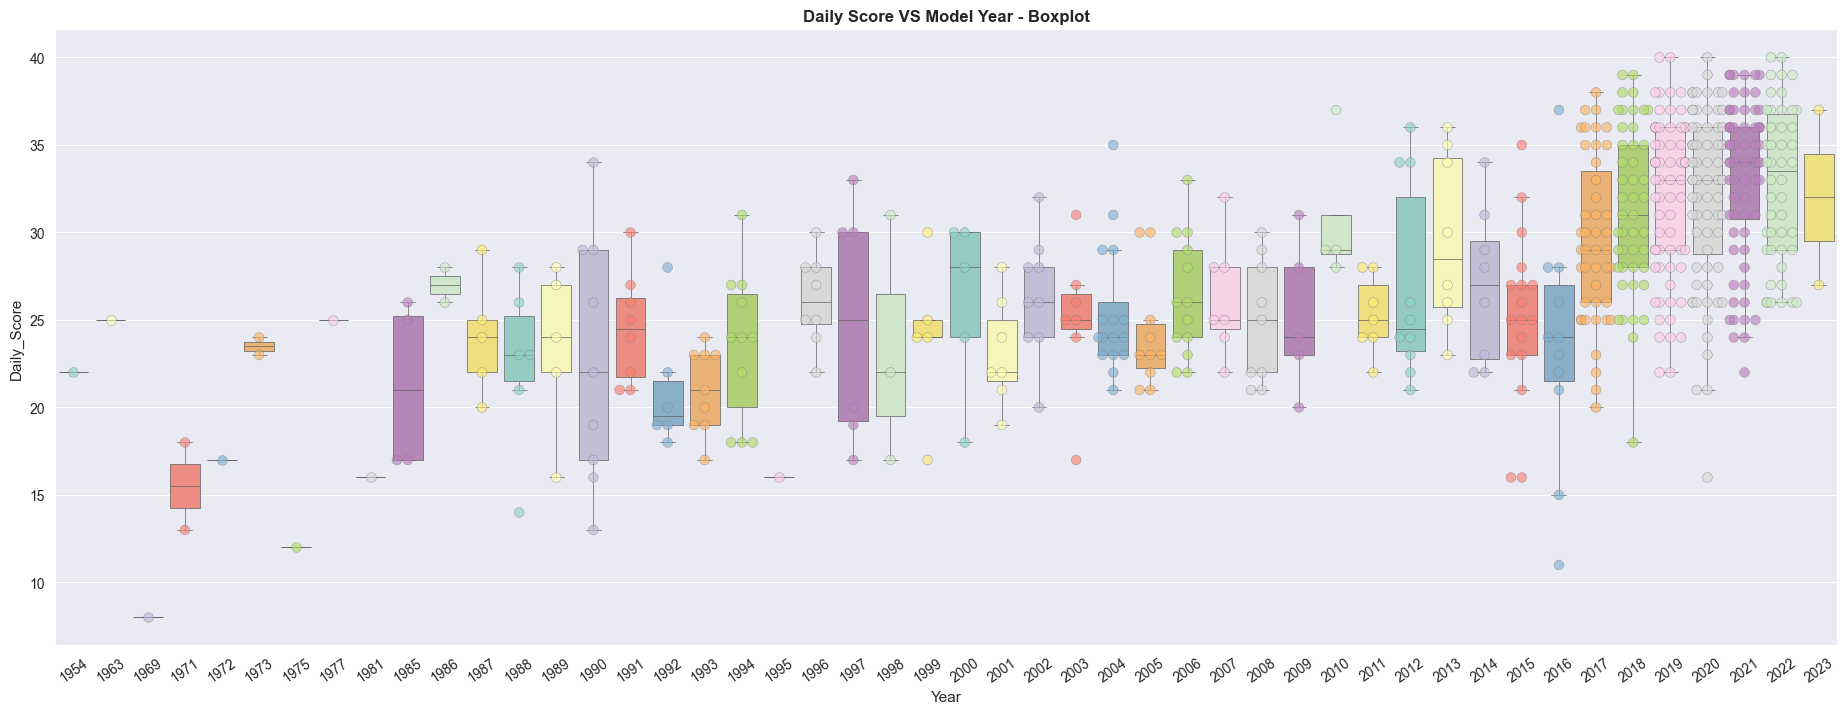

In [140]:
# Daily Score VS Model Year - Boxplot
daily_score = df[['Year', 'Daily_Score']].astype({"Daily_Score": float})
plot_box(daily_score.astype({'Year': int}), "Year","Year","Daily_Score",'Daily Score VS Model Year - Boxplot')

In [143]:
# ANOVA for Weekend Score vs Year
weekend_obj = ols(formula='Weekend_Score ~ Year', data=weekend_score).fit()
anova_weekend_summary = sm.stats.anova_lm(weekend_obj, typ=2)
display(anova_weekend_summary)

# ANOVA for Daily Score vs Year
weekend_obj = ols(formula='Daily_Score ~ Year', data=daily_score.astype({"Daily_Score": float})).fit()
anova_weekend_summary = sm.stats.anova_lm(weekend_obj, typ=2)
display(anova_weekend_summary)

# Correlation between Weekend Score and Daily Score
display(df[["Weekend_Score", "Daily_Score"]].corr())

#Top 5 Cars - The same of group D because the variables used to rank are the same (daily and weekend score)
top5_cars(["Weekend_Score", "Daily_Score"], df)


,sum_sq,df,F,PR(>F)
Year,5763.724824,47.0,1.263972,0.118272
Residual,52100.521330,537.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Year,9888.525062,47.0,9.964397,6.243222e-48
Residual,11338.534767,537.0,NaN,NaN


,Weekend_Score,Daily_Score
0,,
Weekend_Score,1.000000,-0.313699
Daily_Score,-0.313699,1.000000


0                                 Weekend_Score  Daily_Score  Avg_Score
Year   Brand   Name                                                    
2020.0 McLaren Speedtail                   48.0         26.0       37.0
1994.0 McLaren F1                          47.0         27.0       37.0
2022.0 Lucid   Air Dream Edition           38.0         35.0       36.5
       GMC     Hummer EV Pickup            34.0         39.0       36.5
2021.0 Rivian  R1T                         37.0         36.0       36.5

**ANOVA Results**:
* For Weekend Score based on the Year Model, the  higher than 0.05 p-value  means there's no statistically significant difference in weekend scores among different years.
* For Daily Score based on the Year, the F-statistic is  significantly large with a very small p-value. This suggests a statistically significant difference in daily scores among different yers.

**Correlations**:
* As observed before, there's a negative correlation between "Weekend Score" and "Daily Score" (-0.314).

**Top 5 Cars**:
1. McLaren Speedtail (2020) with an average score of 37.0
2. McLaren F1 (1994) with an average score of 37.0
3. Lucid Air Dream Edition (2022) with an average score of 36.5
4. GMC Hummer EV Pickup (2022) with an average score of 36.5
5. Rivian R1T (2021) with an average score of 36.5

### Bonus Correlation: Additional Correltion

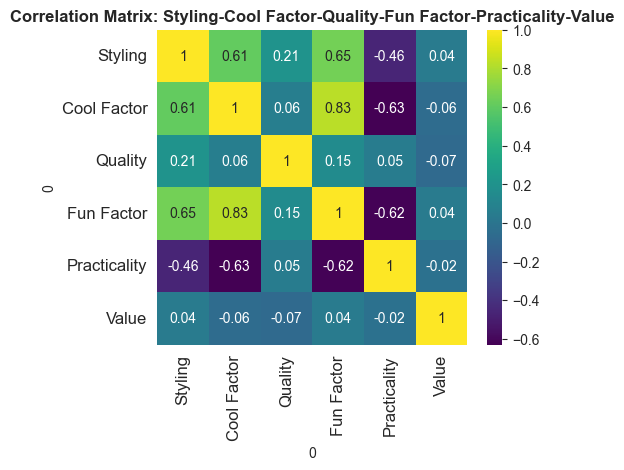

In [69]:
# Additional Correlation
corr_matrix(["Styling", "Cool Factor", "Quality", "Fun Factor", "Practicality", 'Value'], df)

Cool Factor has a strong positeve correlation to Fun Factor. Considering those two variables as predictor in a regression model, we will face multicolinearity. Keep that in mind, we can pick up just on of them while testing interaction effects.

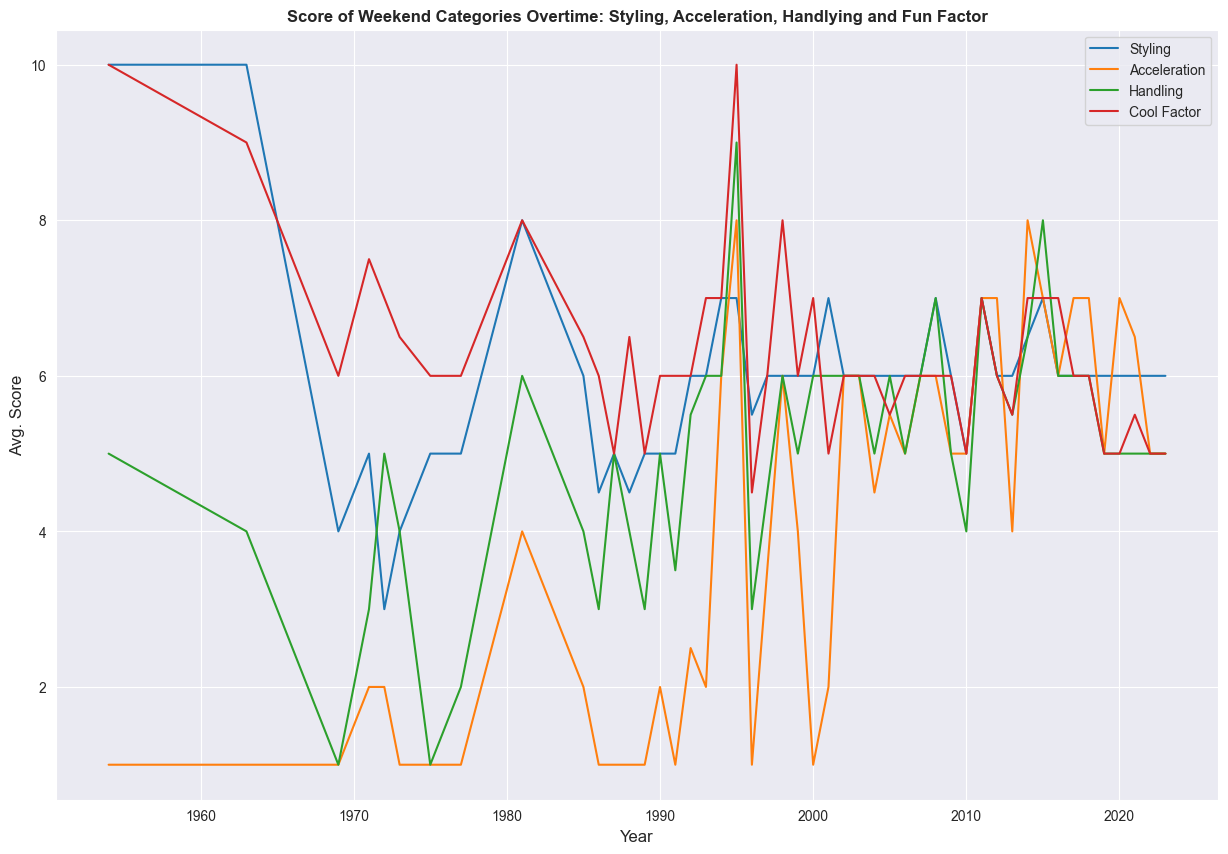

In [161]:
#  'Styling', 'Acceleration', 'Handling', 'Comfort'
filter = ['Styling', 'Acceleration', 'Handling', 'Cool Factor']
#Plot Time series
sea.set_style('darkgrid', {'axes.grid': True})

df_time[filter].plot(kind = 'line', figsize = (15,8))
plt.xlabel ('Year',fontsize =12)
plt.ylabel('Avg. Score',fontsize =12)
plt.legend()
plt.title('Score of Weekend Categories Overtime: Styling, Acceleration, Handlying and Fun Factor',fontsize =12, fontweight = 'bold')
plt.gcf().set_size_inches(15,10)
plt.gcf().set_dpi(100)

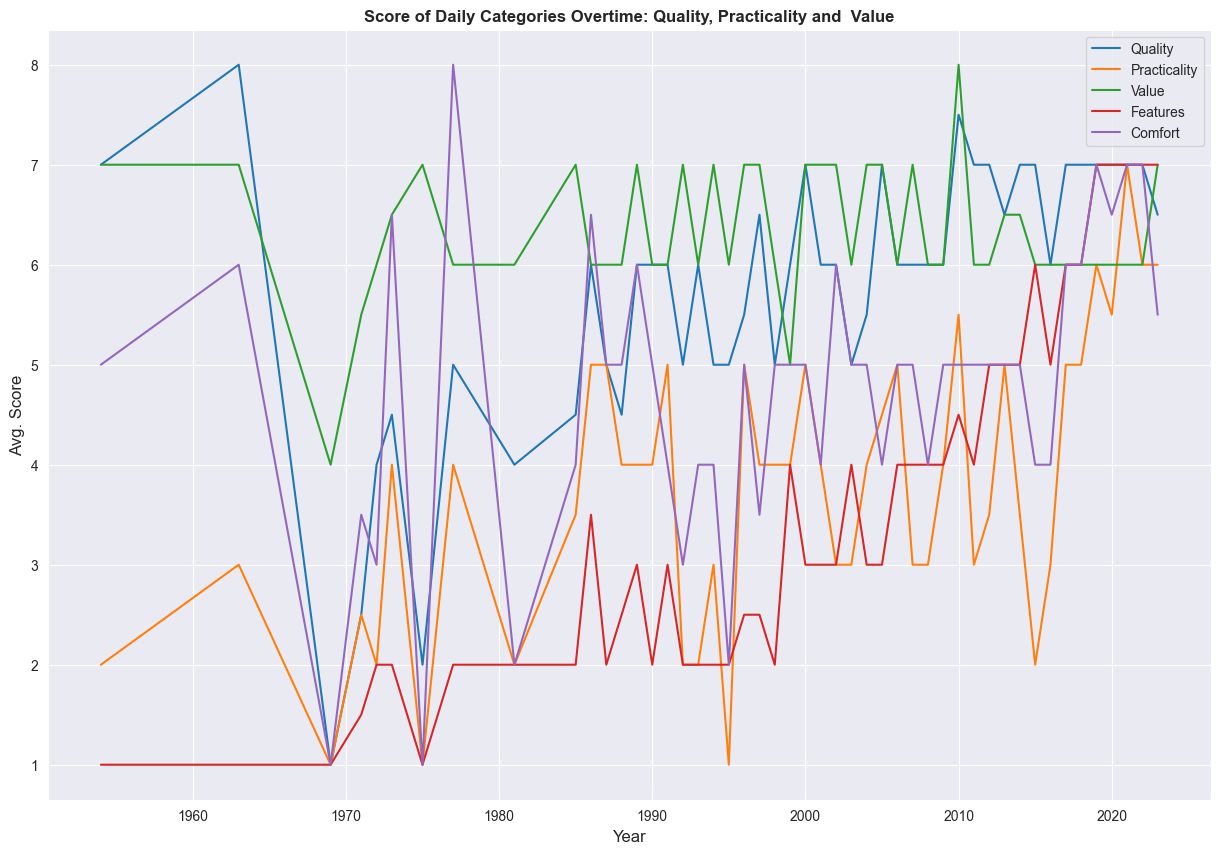

In [162]:
#  'Quality',	'Practicality', 'Value'
filter = ['Quality','Practicality', 'Value', 'Features', 'Comfort']
#Plot Time series
sea.set_style('darkgrid', {'axes.grid': True})

df_time[filter].plot(kind = 'line', figsize = (15,8))
plt.xlabel ('Year',fontsize =12)
plt.ylabel('Avg. Score',fontsize =12)
plt.legend()
plt.title('Score of Daily Categories Overtime: Quality, Practicality and  Value',fontsize =12, fontweight = 'bold')
plt.gcf().set_size_inches(15,10)
plt.gcf().set_dpi(100)

## 2. Interaction Effects & Non-linear Relationships


### 2.1 Interaction Effects

* We will investigate if there are interaction effects between different scoring components that impact the final DougScore. We'll achieve this by:
    * Creating interaction terms between relevant scoring components:
    * We can create interaction terms by multiplying two original variables together. The idea behind creating these terms is to capture any potential combined effect of two variables on the dependent variable that isn't captured when considering each of these variables separately.
For example, the term Styling_Acceleration is created by multiplying the Styling score with the Acceleration score for each entry in the dataset.
    * Running a regression model with the DougScore as the dependent variable and the original scoring components and the interaction terms as independent variables.
* Source: https://statisticsbyjim.com/regression/interaction-effects/

Let's begin by creating interaction terms for the weekend appeal components, as they're likely to interact with each other:

* Styling
* Acceleration
* Handling
* Fun Factor
* Cool Factor

The combinations we'll consider are:
* Styling x Acceleration
* Styling x Handling
* Acceleration x Handling
* Acceleration x Fun Factor
* Handling x Fun Factor

In [150]:
# Create interaction terms
df = df.copy().astype({'Styling': float, 'Acceleration': float, 'Handling': float, 'Fun Factor':
                       float, 'Doug_Score': float, 'Cool Factor': float, 'Practicality': float,
                       'Quality': float, 'Comfort': float, 'Value': float, 'Features': float})
df['Styling_Acceleration'] = df['Styling'] * df['Acceleration']
df['Styling_Handling'] = df['Styling'] * df['Handling']
df['Acceleration_Handling'] = df['Acceleration'] * df['Handling']
df['Acceleration_FunFactor'] = df['Acceleration'] * df['Fun Factor']
df['Handling_FunFactor'] = df['Handling'] * df['Fun Factor']

# Define independent variables including interaction terms
X = df[['Styling', 'Acceleration', 'Handling', 'Fun Factor', 'Cool Factor', 
                   'Styling_Acceleration', 'Styling_Handling', 'Acceleration_Handling', 
                   'Acceleration_FunFactor', 'Handling_FunFactor']]
X = sm.add_constant(X)  # Add a constant to the model

# Define dependent variable
y = df['Doug_Score']

# Run regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Doug_Score   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.25e-190
Time:                        16:47:57   Log-Likelihood:                -1705.4
No. Observations:                 585   AIC:                             3433.
Df Residuals:                     574   BIC:                             3481.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     30.0607      2.362     12.725      0.000      25.421      34.701
Styling                    2.0700      0.524      3.950      0.000       1.041       3.099
Acceleration               3.1431      0.571      5.506      0.000       2.022       4.264
Handling                   1.0897      0.728      1.496      0.135      -0.341       2.520
Fun Factor                 0.2464      0.362      0.681      0.496      -0.464       0.957
Cool Factor               -0.1299      0.173     -0.753      0.452      -0.469       0.209
Styling_Acceleration      -0.0361      0.095     -0.380      0.704      -0.223       0.151
Styling_Handling          -0.1352      0.144     -0.940      0.348      -0.418       0.147
Acceleration_Handling     -0.1001      0.059     -1.691      0.091      -0.216       0.016
Acceleration_FunFactor     0.0083      0.063      0.132      0.895      -0.115       0.131
Handling_FunFactor         0.0103      0.092      0.112      0.911      -0.170       0.191
==============================================================================
Omnibus:                       18.219   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.560
Skew:                          -0.394   Prob(JB):                     5.66e-05
Kurtosis:                       3.424   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interaction Effects for Weekend Score: Findings
From the regression output, here are some key takeaways:

* **R-squared**: The model explains approximately 79.5% of the variance in the DougScore, which indicates that the model is fairly effective at capturing the relationship between the independent variables and the DougScore.
* **Significant Variables**: Among the original scoring components (excluding the interaction terms), Styling, Acceleration, and Handling are statistically significant in predicting the DougScore. This means that these factors play a vital role in influencing the DougScore.
* **Interaction Terms**: Among the interaction terms we added, none seem to be statistically significant (p-value > 0.05). This suggests that, at least for the combinations we considered, there isn't a significant interaction effect that disproportionately influences the DougScore.

To answer the first guiding question:
* No, the interaction between certain components of the DougScore (at least among the combinations we analyzed) does not seem to disproportionately influence the final score. The individual components themselves (like Styling, Acceleration, and Handling) are more influential.

Now let's apply the same logic for the daily scoring categories:

* Features
* Quality
* Value
* Practicality

Combinations:
* Features x Comfort
* Features x Quality
* Comfort x Quality
* Comfort x Practicality
* Quality x Practicality
* Practicality x Value

In [152]:

# Create interaction terms for Daily Usability components
df['Features_Comfort'] = df['Features'] * df['Comfort']
df['Features_Quality'] = df['Features'] * df['Quality']
df['Comfort_Quality'] = df['Comfort'] * df['Quality']
df['Comfort_Practicality'] = df['Comfort'] * df['Practicality']
df['Quality_Practicality'] = df['Quality'] * df['Practicality']
df['Practicality_Value'] = df['Practicality'] * df['Value']

# Define independent variables including interaction terms for Daily Usability components
X_daily = df[['Features', 'Comfort', 'Quality', 'Practicality', 'Value', 
                         'Features_Comfort', 'Features_Quality', 'Comfort_Quality', 
                         'Comfort_Practicality', 'Quality_Practicality', 'Practicality_Value']]
X_daily = sm.add_constant(X_daily)  # Add a constant to the model

# Run regression model for Daily Usability components
model_daily = sm.OLS(y, X_daily).fit()

# Get the summary of the regression
model_daily_summary = model_daily.summary()
model_daily_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Doug_Score   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     75.45
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          8.27e-104
Time:                        16:48:08   Log-Likelihood:                -1908.1
No. Observations:                 585   AIC:                             3840.
Df Residuals:                     573   BIC:                             3893.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   19.0146      5.016      3.790      0.000       9.162      28.868
Features                 3.6371      1.009      3.604      0.000       1.655       5.619
Comfort                 -1.0737      1.093     -0.983      0.326      -3.220       1.072
Quality                  3.6944      0.682      5.413      0.000       2.354       5.035
Practicality            -0.4975      1.022     -0.487      0.626      -2.504       1.509
Value                    2.4435      0.577      4.233      0.000       1.310       3.577
Features_Comfort        -0.1060      0.101     -1.051      0.294      -0.304       0.092
Features_Quality        -0.0352      0.128     -0.275      0.784      -0.287       0.217
Comfort_Quality         -0.1111      0.176     -0.631      0.529      -0.457       0.235
Comfort_Practicality     0.3882      0.095      4.106      0.000       0.202       0.574
Quality_Practicality    -0.2106      0.110     -1.921      0.055      -0.426       0.005
Practicality_Value      -0.2840      0.103     -2.750      0.006      -0.487      -0.081
==============================================================================
Omnibus:                        8.939   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.073
Skew:                          -0.287   Prob(JB):                       0.0107
Kurtosis:                       2.793   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interaction Effects: for Daily Scores: Findings 
* R-squared: The model explains approximately 59.2% of the variance in the DougScore for the "Daily Usability" components. This means that these components are influential, but there's still some variance in the DougScore that is unexplained by them.
* Significant Variables: Among the original scoring components (excluding the interaction terms), Features, Quality, and Value are statistically significant in predicting the DougScore. This means these factors are particularly influential in the DougScore.

* Interaction Terms: Among the interaction terms:
    * Comfort_Practicality is statistically significant and positive, suggesting that a combination of high comfort and high practicality scores can contribute more to the overall DougScore than their individual effects.
    * Quality_Practicality and Practicality_Value are also statistically significant but have negative coefficients. This might suggest that as the quality or value score increases, the contribution of practicality to the DougScore diminishes (or vice versa).

To answer the first guiding question for "Daily Scores" components:

* Yes, certain interaction effects between daily usability components influence the final DougScore. For example, high scores in both comfort and practicality seem to amplify each other's effect on the DougScore.

### 2.2 Non-linear Relationships

We will examine the relationships between individual scoring components and the overall DougScore for potential nonlinear patterns. One way to do this is by visualizing the relationships using scatter plots and then checking for any noticeable non-linear patterns. We'll start with the weekend appeal components.​ We are running a regression fitting and measuring their R squared value

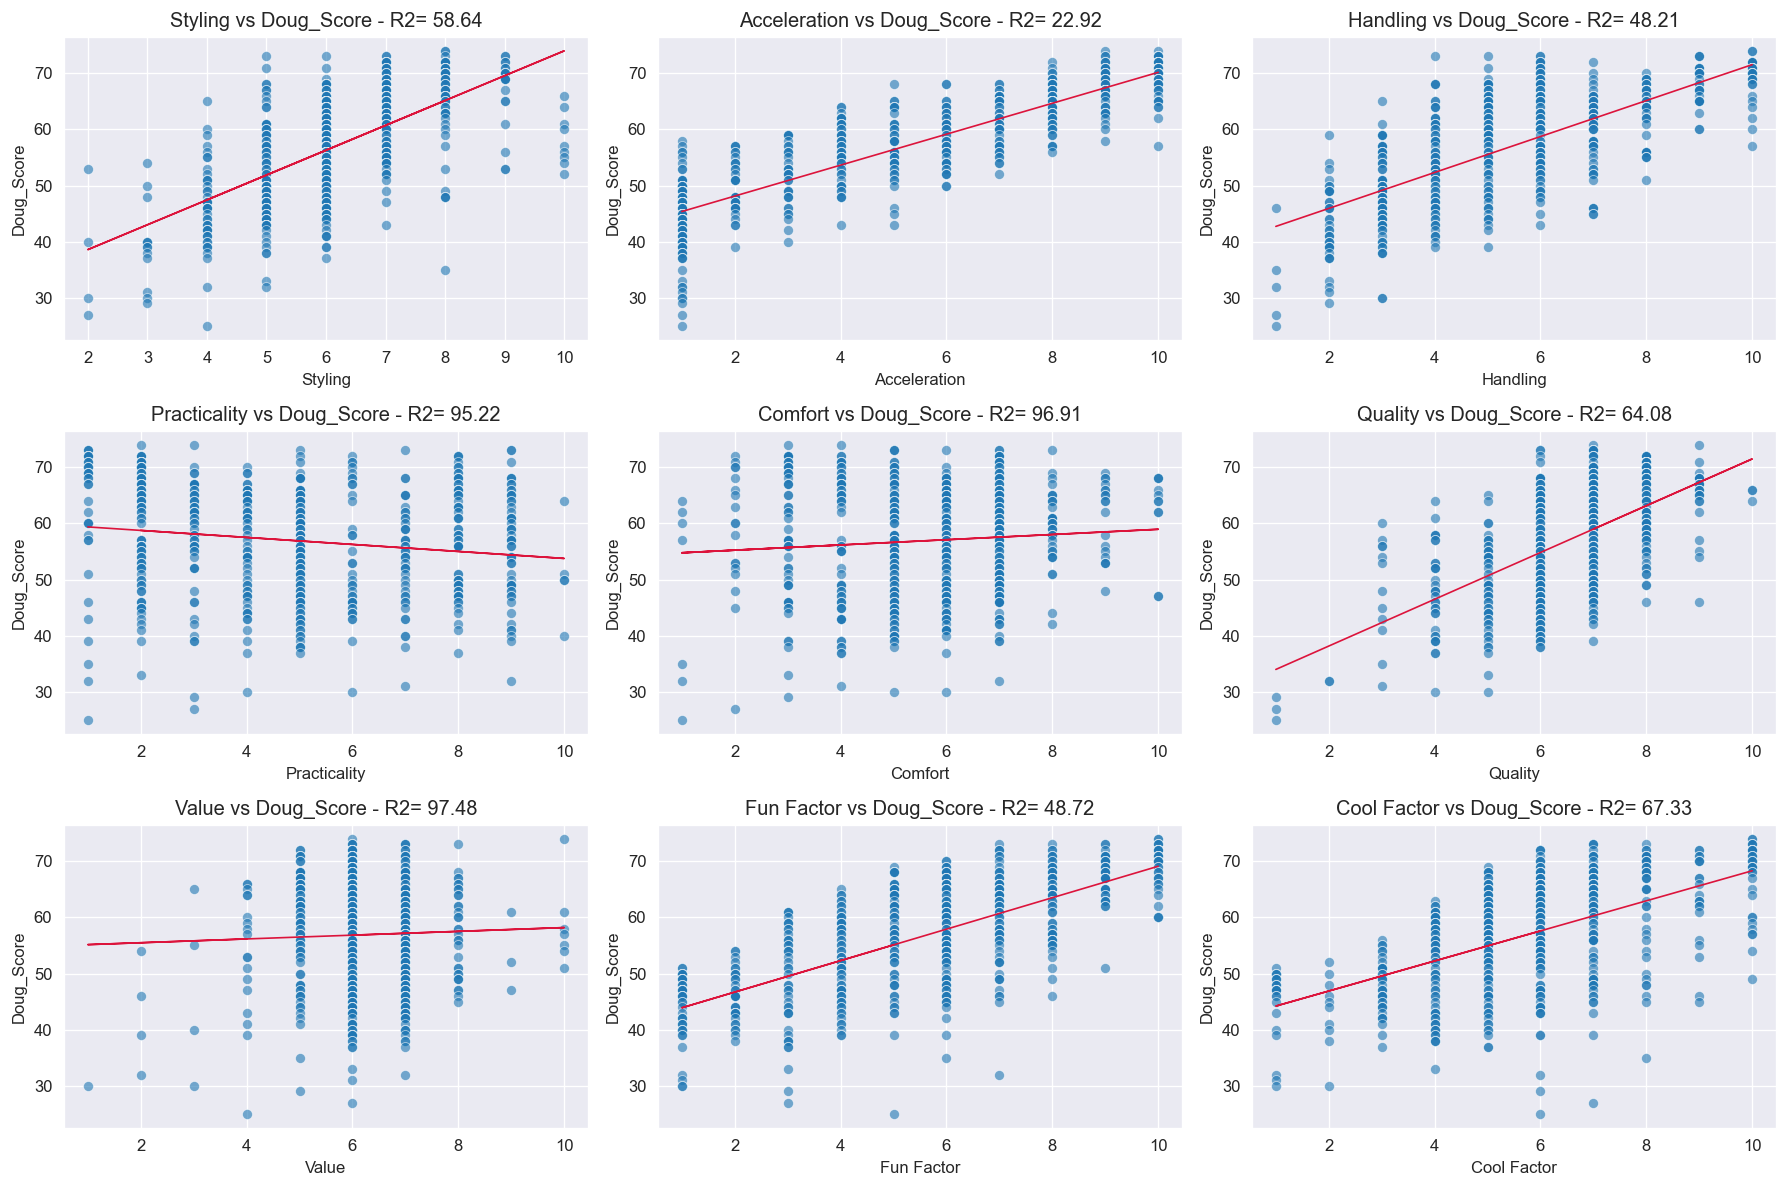

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define weekend appeal components
weekend_components = ['Styling', 'Acceleration', 'Handling', 'Practicality', 'Comfort', 'Quality', 'Value','Fun Factor', 'Cool Factor']

# Plot scatter plots for each component against DougScore
plt.figure(figsize=(15, 10))

for i, component in enumerate(weekend_components, 1):
    #Regression
    X =  df[component].to_numpy()
    Y =  df['Doug_Score'].to_numpy()
    linear_coef = np.polyfit(y = Y, x = X,deg = 1)
    a1,a0 = linear_coef
    F = a0 + a1 *X
    R_2 = mean_squared_error(Y,F)

    #Plot
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=component, y='Doug_Score', alpha=0.6)
    plt.plot(X,F, '-', linewidth= 1, c= 'crimson')
    plt.title(f'{component} vs Doug_Score - R2= {round(R_2,2)}' )
    plt.gcf().set_dpi(120)

plt.tight_layout()
plt.show()


#### Non-linear Relationships: Findings
From the scatter plots above, we can make the following observations:

1. Styling: There's a somewhat linear relationship between styling and DougScore. Vehicles with higher styling scores tend to have higher DougScores, though there's a spread of scores especially for styling values around 5 to 7.
2. Acceleration: A clear linear trend is visible. Vehicles with higher acceleration scores generally have higher DougScores.
3. Handling: Again, a somewhat linear trend is seen. Higher handling scores correlate with higher DougScores.
4. Fun Factor: There's quite a spread, especially for vehicles with fun factor scores between 5 and 8. Nevertheless, higher fun factor scores generally correlate with higher DougScores.
5. Cool Factor: This has a wide spread of DougScores across different cool factor values. However, a general trend can be observed where vehicles with higher cool factor scores tend to have higher DougScores.
6. Features: A general upward trend is observed, suggesting that vehicles with higher features scores typically have higher DougScores. The relationship seems mostly linear.
7. Comfort: The relationship is a bit spread out but has an overall upward trend. Cars with higher comfort scores generally have higher DougScores, and this relationship appears mostly linear as well.
8. Quality: A clear linear trend is visible. Vehicles with higher quality scores tend to have higher DougScores.
9. Practicality: The relationship appears slightly curved, with a stronger linear trend at lower practicality scores and a bit more spread at higher scores. This suggests the possibility of a non-linear relationship, where the influence of practicality on the overall score might diminish or plateau at higher scoring levels.
10. Value: This has a wide spread of DougScores across different value scores. However, a general upward trend suggests that vehicles with higher value scores tend to have higher DougScores. The relationship is broadly linear, but with a lot of variance.

To summarize the answer to the second guiding question:
* The influence of individual components on the DougScore appears to be somewhat linear for the components we visualized. We don't observe any evident plateauing or diminishing at different scoring levels with Practicality being an exception where there might be a slight non-linear relationship.

## 3. Explanation

#### 3.1 Implications of Identified Interaction Effects or Non-linear Relationships:

**Weekend Scores**:
* Interaction Effects: No significant interaction effects were observed among the combinations considered. This implies that the individual attributes of a car related to its "Weekend Appeal" (like styling, acceleration, handling, etc.) contribute to the DougScore more or less independently.
* Non-linear Relationships: The relationships between individual weekend scoring components and the DougScore appeared mostly linear. This means that improvements in attributes like acceleration and styling directly correspond to improvements in the DougScore.

**Daily Scores**:
* Interaction Effects: Significant interaction effects were observed between attributes like comfort and practicality. This suggests that certain combinations of daily usability attributes can either amplify or diminish their collective influence on the DougScore.
* Non-linear Relationships: Most relationships were linear, with "Practicality" being a potential exception. As practicality scores increase, their influence on the DougScore might diminish or plateau.

#### 3.2 Hypotheses or Reasoning Behind Observed Patterns or Anomalies:

**Weekend Scores**:
* Linear Relationships: Doug might weigh cars' performance and aesthetic appeal in a straightforward manner, where each increase in a car's acceleration or styling score proportionally improves its overall appeal.
* Lack of Interaction Effects: Doug likely evaluates performance attributes independently. For instance, a car with great styling but poor acceleration might not see its styling score affected by its acceleration performance.

**Daily Scores**:
* Interaction Effects: The significant interaction between comfort and practicality might indicate that a car that is both comfortable and practical is especially appealing in Doug's view, more so than if it excelled in just one of those areas.
* Practicality Plateau: The potential non-linear relationship with practicality suggests that after a certain point, additional practicality might not add as much value in Doug's assessment.

#### 3.3 Potential Real-world Interpretations or Applications:

**Weekend Scores**:
* Car enthusiasts and manufacturers can focus on individual performance and aesthetic attributes to improve a car's weekend appeal. Improving acceleration, for instance, will likely lead to a direct improvement in the DougScore.
* Advertisers can highlight attributes with strong linear relationships to the DougScore when promoting performance or luxury cars reviewed by Doug.

**Daily Scores**:
* Manufacturers aiming to produce daily-use cars should consider the synergy between comfort and practicality. A car that excels in both areas might receive a particularly high DougScore.
* The potential diminishing returns with practicality suggest that there might be an optimal level of practicality beyond which other attributes (like comfort or features) become more crucial to improve.
Advertisers can emphasize the combination of comfort and practicality when promoting family cars or daily-use vehicles that have been reviewed by Doug.